In [17]:
# defining the neural network class
import numpy

class neuralNetwork:
    # function for initializing neural network
    # The "self" is used to represent the instance of the class. 
    # With this keyword, you can access the attributes and methods of the class in python.
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each nodes
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate

        # Linking the weight matrices, wih, who
        # wih - weight linked with input and hidden layer
        # who = wieight linked with output and hidden layer
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21 like input to hidden 1, input 2 to hidden 1.
        # w12 w22 etc visualized in paper. 
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes, self.hnodes))
    
        # updated code to initialize the weights
        #self.wih = (numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)))        
        #self.who = (numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)))        

        # Using the sigmoid function as the activation function
        import scipy.special
        self.activation_function = lambda x: scipy.special.expit(x)
        # lambda is a special way of declaring functions which is anonymous(nameless) - 
        # it takes x as the input and returns the sigmoid function output using expit()

        pass
        #The pass statement is used as a placeholder for future code. 
        # When the pass statement is executed, nothing happens, 
        # but you avoid getting an error when empty code is not allowed. 
        # Empty code is not allowed in loops, function definitions, class definitions, or in if statements.
        

    # function for training the network
    def train(self, input_list, target_list):
        # feeding forward the signal from the input to the final layer
        # convert the input and target list into a 2D matrix and transpose
        inputs = numpy.array(input_list, ndmin=2).T

        # target list contains the training data in a list for training the network
        targets = numpy.array(target_list, ndmin=2).T

        #calculate signals emerging in the hidden layer from the input
        hidden_inputs = numpy.dot(self.wih, inputs)

        #calculate signals generated by the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        #calculate signals generated into the final layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        #calculate signals emerging from the final layer (activation sheets by firing neurons)
        final_outputs = self.activation_function(final_inputs)

        #calculating the error between the target and actual for the neural network
        output_errors = targets - final_outputs
        
        # updating the weights according to the error for optimization and weight tuning
        # the output errors found above is the hidden layer errors.
        # the output/hidden layer errors need to be split by weight
        # then the split weight should be recombined with the hidden nodes to adjust/tune the network
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layer nodes
        self.who += self.lr  * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
    

        # update the weights for the links between the input and the hidden  layer nodes
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

    # function for implementing queries for the neural network
    # takes input to a network and returns the output of the network
    def query(self, input_list):
        # following will use numpy to convert the inputs into 2D array and then transpose with .T
        inputs = numpy.array(input_list, ndmin=2).T

        # calculate the signals emerging in the hidden layer from the inputs
        hidden_inputs = numpy.dot(self.wih, inputs)

        # calculate signals emerging from the hidden layer neurons to the next layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate the signals into the final output layer - will act as inputs to the final layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        #calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs



In [18]:
# enter some small node and learning rate values for testing the network classes

input_nodes = 784
#input dataset was 28*28 pixels =784 nodes that make up the handwritten image dataset
output_nodes = 10
# by changing the output nodes the the number of predicted output class will also change.

hidden_nodes = 100
# hidden nodes selected less than input nodes because the eural network should select features which can be shorter than the input dataset
# chossing smaller value helps the network to summarize the key features of the dataset
# output nodes are 10
# so selecting 100 seems enough for the network to express the features. 
# selecting smaller values may lead the network to not find enough explanatory features
learning_rate = 0.3

# creating instance of the neural network class
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [19]:
#n.query([1.0, 0.5, -1.5])

In [20]:
# use numpy to generate matrices of weight values.
# at first assign very low weight values, for instance between 0 and 1. 

import numpy

numpy.random.rand(3, 3) 
# 3*3 matirix with random numbers betwen 0 and 1 for weight values. 
# 3 nodes assigned previously so 3*3 matrix used.


array([[0.52523498, 0.50030355, 0.63749523],
       [0.98527904, 0.29524321, 0.73328985],
       [0.1896711 , 0.39070466, 0.05651778]])

In [21]:
# at first open the dataset from the local path in read only mode
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')

# use redlines() to read each record at a time as a list.append
training_data_list = training_data_file.readlines()

# close the dataset to avoid conflict elsewhere
training_data_file.close()

In [22]:
len(training_data_list)

100

In [23]:
training_data_list[7]

'3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,43,105,255,253,253,253,253,253,174,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,139,224,226,252,253,252,252,252,252,252,252,158,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,252,252,252,252,253,252,252,252,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,252,252,230,132,133,132,132,189,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,29,24,0,0,0,0,14,226,252,252,172,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,243,252,252,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,189,252,252,252,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,212,247,252,252,252,204,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,125,193,193,193,253,252,252,252,238,102,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,222,252,252,252,252,253,252,25

In [24]:
import numpy
import matplotlib.pyplot


# Split the values of the first list based on commas
#all_values = training_data_list[0].split(',')

# remove the first label value and convert the remaining color pixel values into a numeric matrix
#image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))

# now show only the image array
#matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation='None')

In [25]:
# scale the input range from 0-255 to 0.01-1.00 using formula
# re scaled and shaped the smaller mnist dataset

#scaled_input = (numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
#print(scaled_input)

In [26]:
# the network fires neuron at the label which has the greates prediction accuracy. 
# for example if the output is 0, then the oth neuron will fire and remaining will stay silent. 
# there can also be uncertainities if 2 handwrien digits seem similar like 4 and 9

# setting 10 output nodes for 10 digits
#onodes = 10

#setting all the nodes value to 0.01
#targets = numpy.zeros(onodes) + 0.01

# the first digit is zero, so setting the first digit to fire first neuron with highest value
#targets[int(all_values[0])] = 0.99

In [27]:
#print(targets)

In [28]:
# training the network with the whole dataset

for record in training_data_list:
    #split based on comma
    all_values = record.split(',')

    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # create targets of output values (all neurons will fire 0.01 except the one hat is selected)
    targets = numpy.zeros(output_nodes) + 0.01

    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass
    

In [29]:
# testing phase for the neural network
# first load the mnist test dataset
test_data_file = open('mnist_dataset/mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [30]:
# get the first data file
all_values = test_data_list[0].split(',')
print(all_values[0])
# the oth index of the train dataset contains 7

7


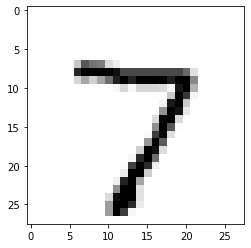

In [31]:
import numpy
import matplotlib.pyplot
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap = "Greys")

# visualizing the oth index handwritten image from the test dataset

In [32]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

# testing if the neuron fires greatest value for the 7th output node to check the network capability

array([[0.0255312 ],
       [0.0238203 ],
       [0.02634962],
       [0.07968295],
       [0.06958572],
       [0.01583055],
       [0.00917697],
       [0.89064248],
       [0.02165373],
       [0.04133097]])